# Dataset Statistics
This notebook calculates the basic statistics of the dataset and visualizes the histogram of the number of records per country/driver and the histogram of the number of records per year.

- Author: Xinshuang Liu, Haoyu Hu
- Email: xil235@ucsd.edu, hah034@ucsd.edu

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
from dataset import TreeCoverLossDataset, DriverTypeDataset

In [2]:
def convert_list_to_histogram(data_list, save_path, title, fontsize=12, bins=6):
    plt.figure(figsize=(10, 6))
    plt.hist(data_list, bins=bins, edgecolor="black", alpha=0.7)
    plt.title(title, fontsize=fontsize + 2, fontweight="bold")
    plt.xlabel("Value", fontsize=fontsize)
    plt.ylabel("Frequency", fontsize=fontsize)
    plt.grid(axis="y", linestyle="--", alpha=0.8)
    plt.savefig(save_path)
    plt.show()


def dataset_statistics(dataset):
    os.makedirs("Statistics", exist_ok=True)

    # Statistics of the number of records for each country
    record_count = {}
    for data, _ in dataset:
        record_count[_] = len(data)
    if isinstance(dataset, TreeCoverLossDataset):
        convert_list_to_histogram(
            list(record_count.values()),
            "Statistics/Distribution of Number of Records per Country.png",
            "Distribution of Number of Records per Country",
        )
    elif isinstance(dataset, DriverTypeDataset):
        convert_list_to_histogram(
            list(record_count.values()),
            "Statistics/Distribution of Number of Records per Driver.png",
            "Distribution of Number of Records per Driver",
        )

    # Statistics of the number of records for each year
    year_count = {}
    for data, _ in dataset:
        for year in data[:, 0]:
            year = int(year + 0.5)
            year_count[year] = year_count.get(year, 0) + 1
    if isinstance(dataset, TreeCoverLossDataset):
        convert_list_to_histogram(
            list(year_count.values()),
            "Statistics/Distribution of Number of Records per Year across Countries.png",
            "Distribution of Number of Records per Year across Country",
        )
    elif isinstance(dataset, DriverTypeDataset):
        convert_list_to_histogram(
            list(year_count.values()),
            "Statistics/Distribution of Number of Records per Year across Drivers.png",
            "Distribution of Number of Records per Year across Drivers",
        )

    # Basic Statistics
    number_of_data = len(list(record_count.keys()))
    number_of_years = len(list(year_count.keys()))

    tree_cover_loss_all = []
    co2_all = []
    years_all = []
    for data, _ in dataset:
        years_all.extend(data[:, 0].tolist())
        tree_cover_loss_all.extend(data[:, 1].tolist())
        co2_all.extend(data[:, 2].tolist())
    tree_cover_loss_all_np = np.array(tree_cover_loss_all)
    co2_all_np = np.array(co2_all)
    mean_of_tree_cover_loss = tree_cover_loss_all_np.mean()
    mean_of_co2 = co2_all_np.mean()
    std_of_tree_cover_loss = tree_cover_loss_all_np.std()
    std_of_co2 = co2_all_np.std()
    median_of_years = np.median(years_all)

    basic_statistics = {
        "Number of Data (Countries/Driver Types)": number_of_data,
        "Number of Years": number_of_years,
        "Mean of Tree Cover Loss": mean_of_tree_cover_loss,
        "Mean of CO2": mean_of_co2,
        "Std of Tree Cover Loss": std_of_tree_cover_loss,
        "Std of CO2": std_of_co2,
        "Median of Years": median_of_years,
    }

    if isinstance(dataset, TreeCoverLossDataset):
        with open("Statistics/Basic Statistics Countries.json", "w") as f:
            json.dump(basic_statistics, f, indent=4)
    elif isinstance(dataset, DriverTypeDataset):
        with open("Statistics/Basic Statistics Drivers.json", "w") as f:
            json.dump(basic_statistics, f, indent=4)

    return basic_statistics


def print_json(json_file):
    for k, v in json_file.items():
        print(f"{k}: {v}")

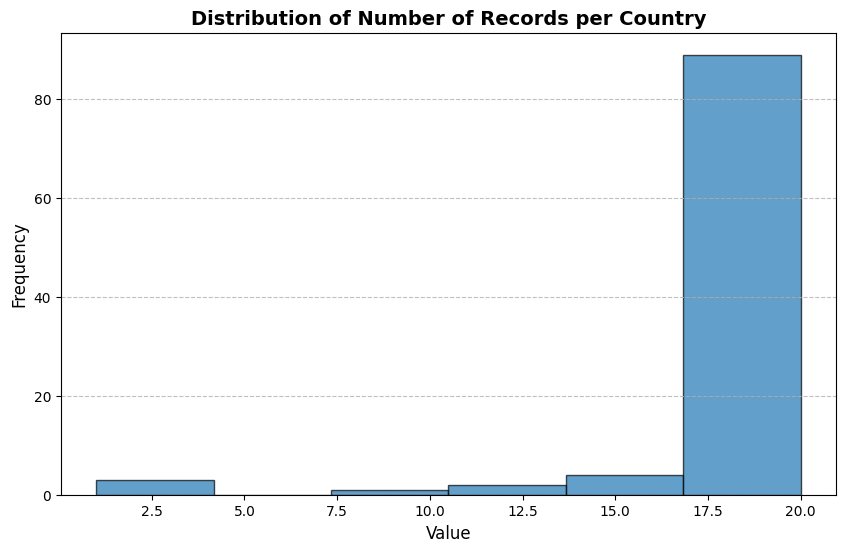

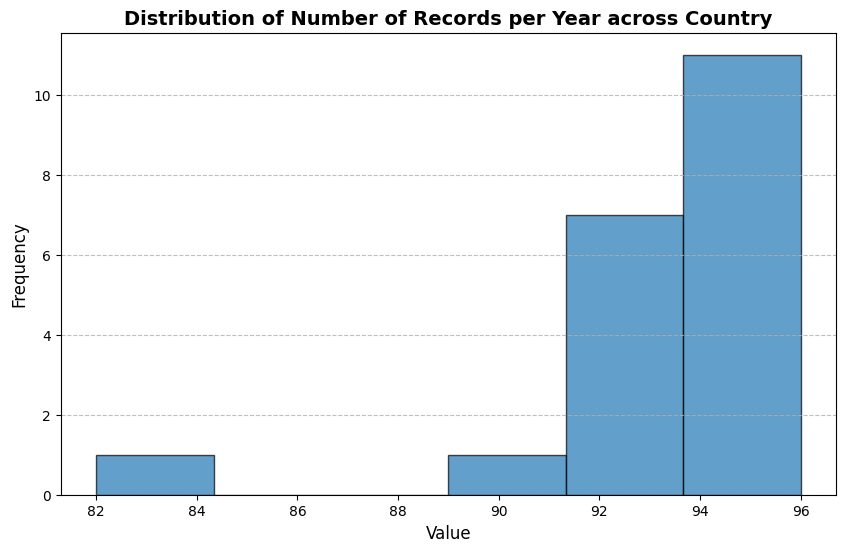

Number of Data (Countries/Driver Types): 99
Number of Years: 20
Mean of Tree Cover Loss: 35241.32757604216
Mean of CO2: 23421820.04351023
Std of Tree Cover Loss: 162808.0931897569
Std of CO2: 108074813.65062383
Median of Years: 2010.0


In [3]:
dataset = TreeCoverLossDataset("TreeCoverLoss_2001-2020 _InPrimaryForest.csv")
basic_statistics = dataset_statistics(dataset)
print_json(basic_statistics)

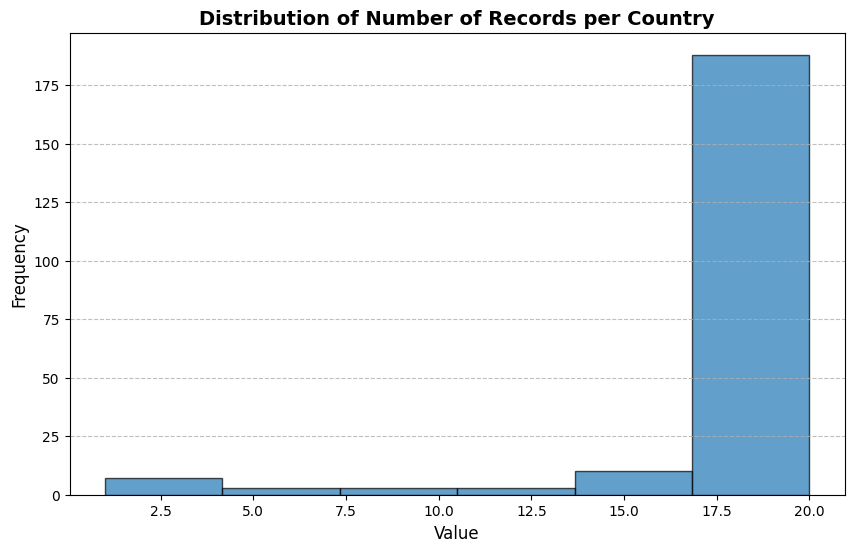

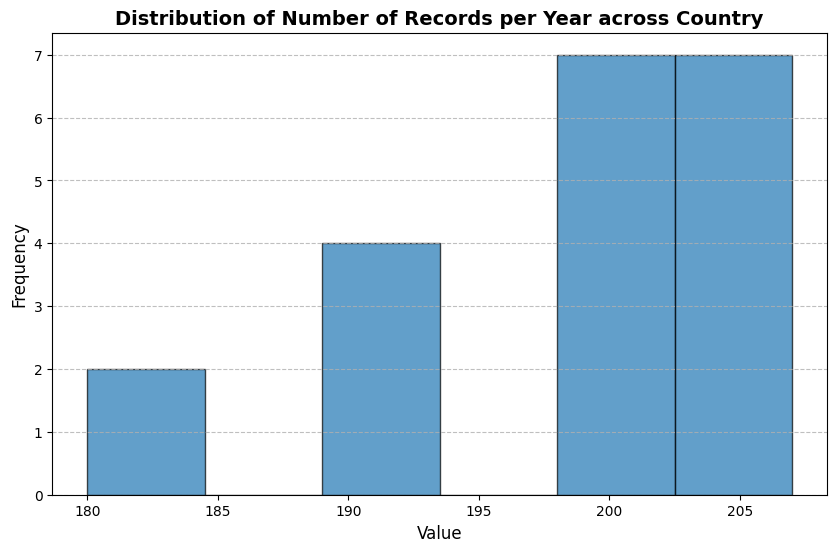

Number of Data (Countries/Driver Types): 214
Number of Years: 20
Mean of Tree Cover Loss: 103698.94074058531
Mean of CO2: 41604199.44815443
Std of Tree Cover Loss: 426795.1186891946
Std of CO2: 168701432.12203524
Median of Years: 2010.0


In [4]:
dataset = TreeCoverLossDataset("TreeCoverLoss_2001-2020_ByRegion.csv")
basic_statistics = dataset_statistics(dataset)
print_json(basic_statistics)

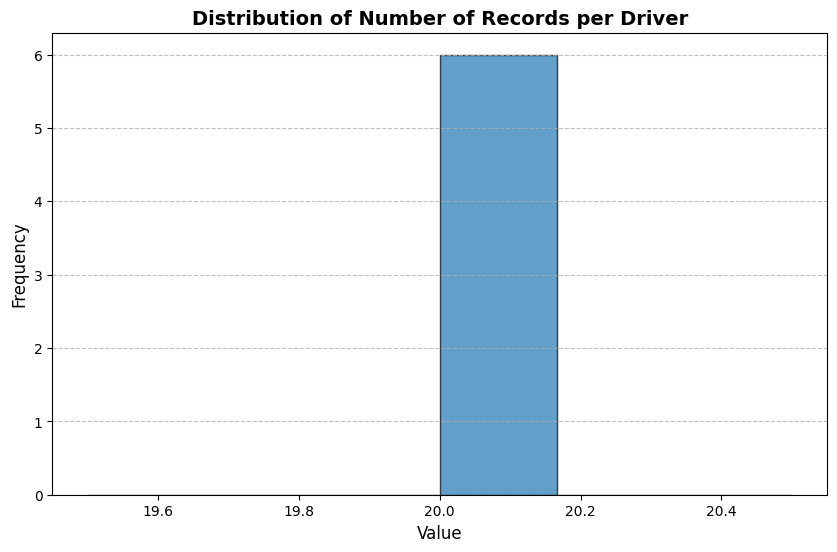

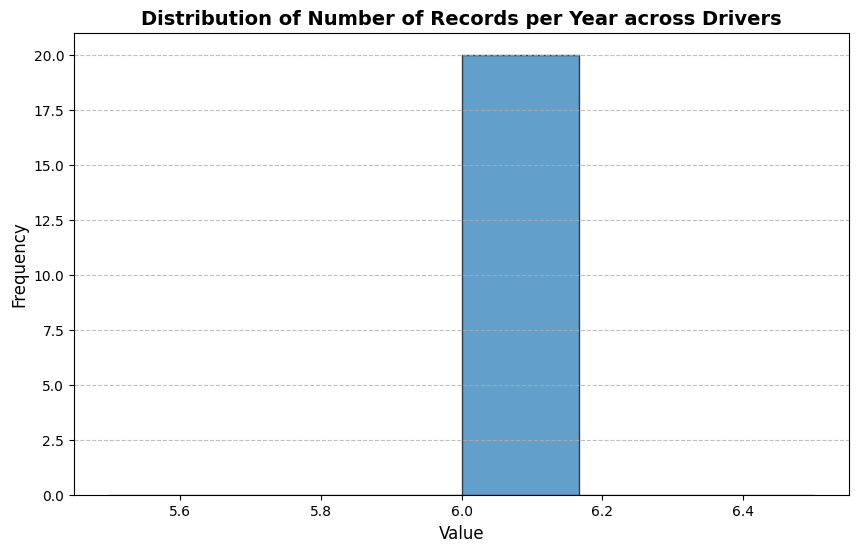

Number of Data (Countries/Driver Types): 6
Number of Years: 20
Mean of Tree Cover Loss: 3428114.1421875
Mean of CO2: 1375365495.9333334
Std of Tree Cover Loss: 2511359.050089085
Std of CO2: 1246965544.0527112
Median of Years: 2010.5


In [5]:
dataset = DriverTypeDataset("TreeCoverLoss_2001-2020_DominantDrivers.csv")
basic_statistics = dataset_statistics(dataset)
print_json(basic_statistics)

## Intuitions gained to design models and experiments

- The std of the data is much larger than the mean of the data. This motivates us to develop a model that is robust to data variations.
- The number of records is very imbalance across years and countries. This indicates that we need to split the training and testing data based on a threshold instead of a fixed proportion of the data.
- The median of the years in all records is 2010. Thus, we can use 2010 as a threshold to split the train and test data, making each of them count for half of the entire dataset.